# 1.0 Getting movie links for scraping

In [50]:
# Get Soup
import requests
from bs4 import BeautifulSoup
import re
import dateutil.parser

##Page list 
pagelist2015 = ['http://www.boxofficemojo.com/yearly/chart/?page=1&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=7&view=releasedate&view2=domestic&yr=2015&p=.htm']
pagelist2014 = ['http://www.boxofficemojo.com/yearly/chart/?yr=2014&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=7&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm']
pagelist2013 = ['http://www.boxofficemojo.com/yearly/chart/?yr=2013&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=7&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm']
pagelist2012 = ['http://www.boxofficemojo.com/yearly/chart/?yr=2012&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=7&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm']
pagelist2011 = ['http://www.boxofficemojo.com/yearly/chart/?yr=2011&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=7&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm']
pagelist = pagelist2015 + pagelist2014 + pagelist2013 + pagelist2012 + pagelist2011

In [51]:
##Find movie links based on page list
movielist = []
for page in pagelist:
    url = page
    response = requests.get(url,headers={'Microsoft Edge':'Metis data science student scraping project'})
    soup = BeautifulSoup(response.text)
    for x in soup.find_all('a'):
        try:
            if "/movies/?id" in x['href']:
                movielist.append(x['href'])
            else:
                continue
        except:
            continue
            
##Translate movie links into full html addresses
htmllist = []
for x in movielist:
    htmllist.append('http://www.boxofficemojo.com'+x+'&adjust_yr=2015&p=.htm')

C:\Users\kennd\Anaconda3\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [52]:
len(htmllist)

3388

# 2.0 Scraping Script

In [53]:
## Import BeautifulSoup and scraping modules
from bs4 import BeautifulSoup
import requests
import re
url = 'http://www.boxofficemojo.com/movies/?id=fruitvale.htm'
response = requests.get(url,headers={'Microsoft Edge':'Metis data science student scraping project'})
soup = BeautifulSoup(response.text)

C:\Users\kennd\Anaconda3\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


## 2.1 Subfunctions to extract data from movie webpages

In [54]:
##Get movie title
def get_movie_title(soup):
    try:
        return soup.find('title').text.split('-')[0].split('(')[0].strip()
    except:
        return None

##Get movie domestic box office gross
def get_movie_domestic_gross(soup):
    try:
        return float(soup.find_all('b')[2].text.replace('$','').replace(',',''))/(10**6)
    except:
        return None
    
##Get movie distributor
def get_movie_distributor(soup):
    try:
        return soup.find(text=re.compile('Distributor')).findNextSibling().text.replace('/',' ').split()[0]
    except:
        return None
    
##Get movie release date
def get_movie_release_date(soup):
    try:
        datestring = soup.find(text=re.compile('Release Date')).findNextSibling().text
        date = dateutil.parser.parse(datestring)
        return date
    except:
        return None
        
##Get movie genre
def get_movie_genre(soup):
    try:
        return soup.find(text=re.compile('Genre:')).findNextSibling().text.split()[0]
    except:
        return None
    
##Get movie runtime
def get_movie_runtime(soup):
    try:
        runtime_string= soup.find(text=re.compile('Runtime')).findNextSibling().text.split()
        return float(runtime_string[0])*60 + float(runtime_string[2])
    except:
        return None

##Get movie MPAA rating
def get_movie_mpaa_rating(soup):
    try:
        return soup.find(text=re.compile('MPAA')).findNextSibling().text
    except:
        return None

##Get movie production budget
def get_movie_prod_budget(soup):
    try:
        prod_budget_string = soup.find(text=re.compile('Production Budget')).findNextSibling().text.replace('$','').replace(',','')
        if 'million' in prod_budget_string:
            return float(prod_budget_string.split()[0])
        else:
            return None
    except:
        return None

##Get movie opening weekend gross
def get_movie_weekend_gross(soup):
    if soup.find(text=re.compile('Wide\xa0Opening')):
        try:
            return float(soup.find(text=re.compile('Wide\xa0Opening')).findNext().text.replace('$','').replace(',',''))/(10**6)
        except:
            return None
    elif soup.find(text=re.compile('Opening\xa0Weekend')):
        try:
            return float(soup.find(text=re.compile('Opening\xa0Weekend')).findNext().text.replace('$','').replace(',',''))/(10**6)
        except:
            return None
    else:
        return None

##Get movie in release days
def get_movie_release_days(soup):
    try:
        return abs(float(soup.find(text=re.compile("In Release")).findNext().text.strip().split()[0]))
    except:
        return None
    

##Get movie widest # of theaters:
def get_movie_no_theaters(soup):
    try:
        return abs(float(soup.find(text=re.compile("Widest")).findNext().text.replace(',','').split()[0]))
    except:
        return None

## 2.2  Combine subfunctions into one function

In [55]:
def get_movie_data(soup):
    datalist = []
    datalist.append(get_movie_title(soup))
    datalist.append(get_movie_domestic_gross(soup))
    datalist.append(get_movie_distributor(soup))
    datalist.append(get_movie_release_date(soup))
    datalist.append(get_movie_genre(soup))
    datalist.append(get_movie_runtime(soup))
    datalist.append(get_movie_mpaa_rating(soup))
    datalist.append(get_movie_prod_budget(soup))
    datalist.append(get_movie_weekend_gross(soup))
    datalist.append(get_movie_release_days(soup))
    datalist.append(get_movie_no_theaters(soup))
    df.append(datalist)

## 2.3 Loop through links and combine into one data frame

In [56]:
##Set df as master list
df = []
for link in htmllist:
    response = requests.get(link,headers={'Microsoft Edge':'Metis data science student scraping project'})
    soup = BeautifulSoup(response.text)
    get_movie_data(soup)

C:\Users\kennd\Anaconda3\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [57]:
import pandas as pd
DF = pd.DataFrame(df, columns = ['title','dom_gross_adj_2015','distributor','release_date','genre','runtime','rating','budget','weekend_gross','in_release_days','max_no_theaters'])
DF.drop_duplicates()
DF.shape

(3388, 11)

### Checkpoint 1: Pickle

In [61]:
##Pickle
import pickle
with open('my_data.pkl', 'wb') as picklefile:
    pickle.dump(DF, picklefile)

In [235]:
##Take out of jar
import pickle
import pandas as pd
import numpy as np
import math
import matplotlib
import datetime
%matplotlib inline
with open("my_data.pkl", 'rb') as picklefile: 
    DF = pickle.load(picklefile)
DF2 = DF.copy()

In [236]:
def get_month(x):
    return x.month

def get_weekday(x):
    return x.isoweekday()

def get_monthday(x):
    return x.day

def get_year(x):
    return x.year

DF2["release_month"] = DF2["release_date"].apply(get_month)
DF2["release_weekday"] = DF2["release_date"].apply(get_weekday)
DF2["release_monthday"] = DF2["release_date"].apply(get_monthday)
DF2["release_year"] = DF2["release_date"].apply(get_year)

In [237]:
##Data filters this early to execute the rest of the script faster
DF2 = DF2[(DF2["release_year"] >= 2011) & (DF2["release_year"] < 2016)]
DF2 = DF2[DF2['genre'] != 'Foreign']
DF2 = DF2[DF2['dom_gross_adj_2015']<600]
DF2 = DF2.dropna()
DF2 = DF2[(DF2.dom_gross_adj_2015>1) & (DF2.budget>1)].reset_index(drop=True)

In [238]:
##Create genre density count for each movie
##Very slow but no choice but to loop through the data frame
two_month_count_list = []
for current_row in range(DF2.shape[0]):
    two_month_count = 0.0
    current_DF = DF2.iloc[current_row,:]
    for compare_row in range(0,DF2.shape[0]):
        compare_DF = DF2.iloc[compare_row,:]
        try: 
            time_delta = abs((current_DF.release_date - compare_DF.release_date).days)
        except:
            time_delta = 100
        if time_delta <= 60 and (current_DF.genre == compare_DF.genre) and current_DF.title != compare_DF.title:
            two_month_count +=1
    two_month_count_list.append(two_month_count)
two_month_count_list = pd.Series(two_month_count_list)

In [239]:
##Create genre density count for each movie
##Very slow but no choice but to loop through the data frame
month_count_list = []
for current_row in range(DF2.shape[0]):
    month_count = 0.0
    current_DF = DF2.iloc[current_row,:]
    for compare_row in range(0,DF2.shape[0]):
        compare_DF = DF2.iloc[compare_row,:]
        try: 
            time_delta = abs((current_DF.release_date -compare_DF.release_date).days)
        except:
            time_delta = 100
        if time_delta <= 30 and (current_DF.genre == compare_DF.genre) and current_DF.title != compare_DF.title:
            month_count +=1
    month_count_list.append(month_count)
month_count_list = pd.Series(month_count_list)

In [240]:
##Create high budget density count for each movie
##Very slow but no choice but to loop through the data frame
budget_two_month_count_list = []
for current_row in range(DF2.shape[0]):
    two_month_count = 0.0
    current_DF = DF2.iloc[current_row,:]
    for compare_row in range(0,DF2.shape[0]):
        compare_DF = DF2.iloc[compare_row,:]
        try: 
            time_delta = abs((current_DF.release_date - compare_DF.release_date).days)
        except:
            time_delta = 100  
        if time_delta <= 60 and compare_DF.budget >= 100 and current_DF.title != compare_DF.title:
            two_month_count +=1
    budget_two_month_count_list.append(two_month_count)
budget_two_month_count_list = pd.Series(budget_two_month_count_list)

In [241]:
##Create high budget density count for each movie
##Very slow but no choice but to loop through the data frame
budget_month_count_list = []
for current_row in range(DF2.shape[0]):
    month_count = 0.0
    current_DF = DF2.iloc[current_row,:]
    for compare_row in range(0,DF2.shape[0]):
        compare_DF = DF2.iloc[compare_row,:]
        try: 
            time_delta = abs((current_DF.release_date - compare_DF.release_date).days)
        except:
            time_delta = 100  
        if time_delta <= 30 and compare_DF.budget >= 100 and current_DF.title != compare_DF.title:
            month_count +=1
    budget_month_count_list.append(month_count)
budget_month_count_list = pd.Series(budget_month_count_list)

### Checkpoint 2: Pickle after creating density counts

In [66]:
##Pickle checkpoint
import pickle
with open('my_data2.pkl', 'wb') as picklefile:
    pickle.dump(DF2, picklefile)

In [67]:
with open("my_data2.pkl", 'rb') as picklefile: 
    DF2 = pickle.load(picklefile)

## Further data transformations

In [68]:
DF2["two_month_genre_density_count"] = two_month_count_list
DF2["month_genre_density_count"] = month_count_list
DF2["two_month_budget_density_count"] = budget_two_month_count_list
DF2["month_budget_density_count"] = budget_month_count_list

NameError: name 'two_month_count_list' is not defined

In [69]:
DF2.release_month = DF2.release_month.astype('category')
DF2.release_weekday = DF2.release_weekday.astype('category')
DF2.release_monthday = DF2.release_monthday.astype('category')
DF2.release_year = DF2.release_year.astype('category')
DF2.distributor = DF2.distributor.astype('category')
DF2.genre = DF2.genre.astype('category')
DF2.rating = DF2.rating.astype('category')

In [70]:
small_distributors = ['CBS','FilmDistrict','Summit','Roadside','Samuel','STX','Freestyle','Anchor','Well','High','Kenn','Newmarket','Oscilloscope','Picturehouse','Quaker','Rocky','A24']
def small_distributor(x):
    if x in small_distributors:
        return "Others"
    else:
        return x

In [71]:
DF2['distributor'] = DF2['distributor'].apply(small_distributor)

In [72]:
other_genres = ['Romantic','Romance','Musical','Sports','Adventure','Period','Western','Documentary','War','Concert','Music','Historical']
def other_genre(x):
    if x in other_genres:
        return "Others"
    else:
        return x

In [73]:
DF2['genre'] = DF2['genre'].apply(other_genre)

### Checkpoint 3: Pickle after data transformations

In [84]:
##Pickle checkpoint
import pickle
with open('my_data2.pkl', 'wb') as picklefile:
    pickle.dump(DF2, picklefile)

In [86]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline
with open("my_data2.pkl", 'rb') as picklefile: 
    DF2 = pickle.load(picklefile)

# 3.0 Exploratory Analysis

In [87]:
#Create copy just to be sure
DF3 = DF2.copy()

From the pairplots above, there's a strong non-linear relationship between budget and the maximum number of theaters. There's a risk of multicollinearity.

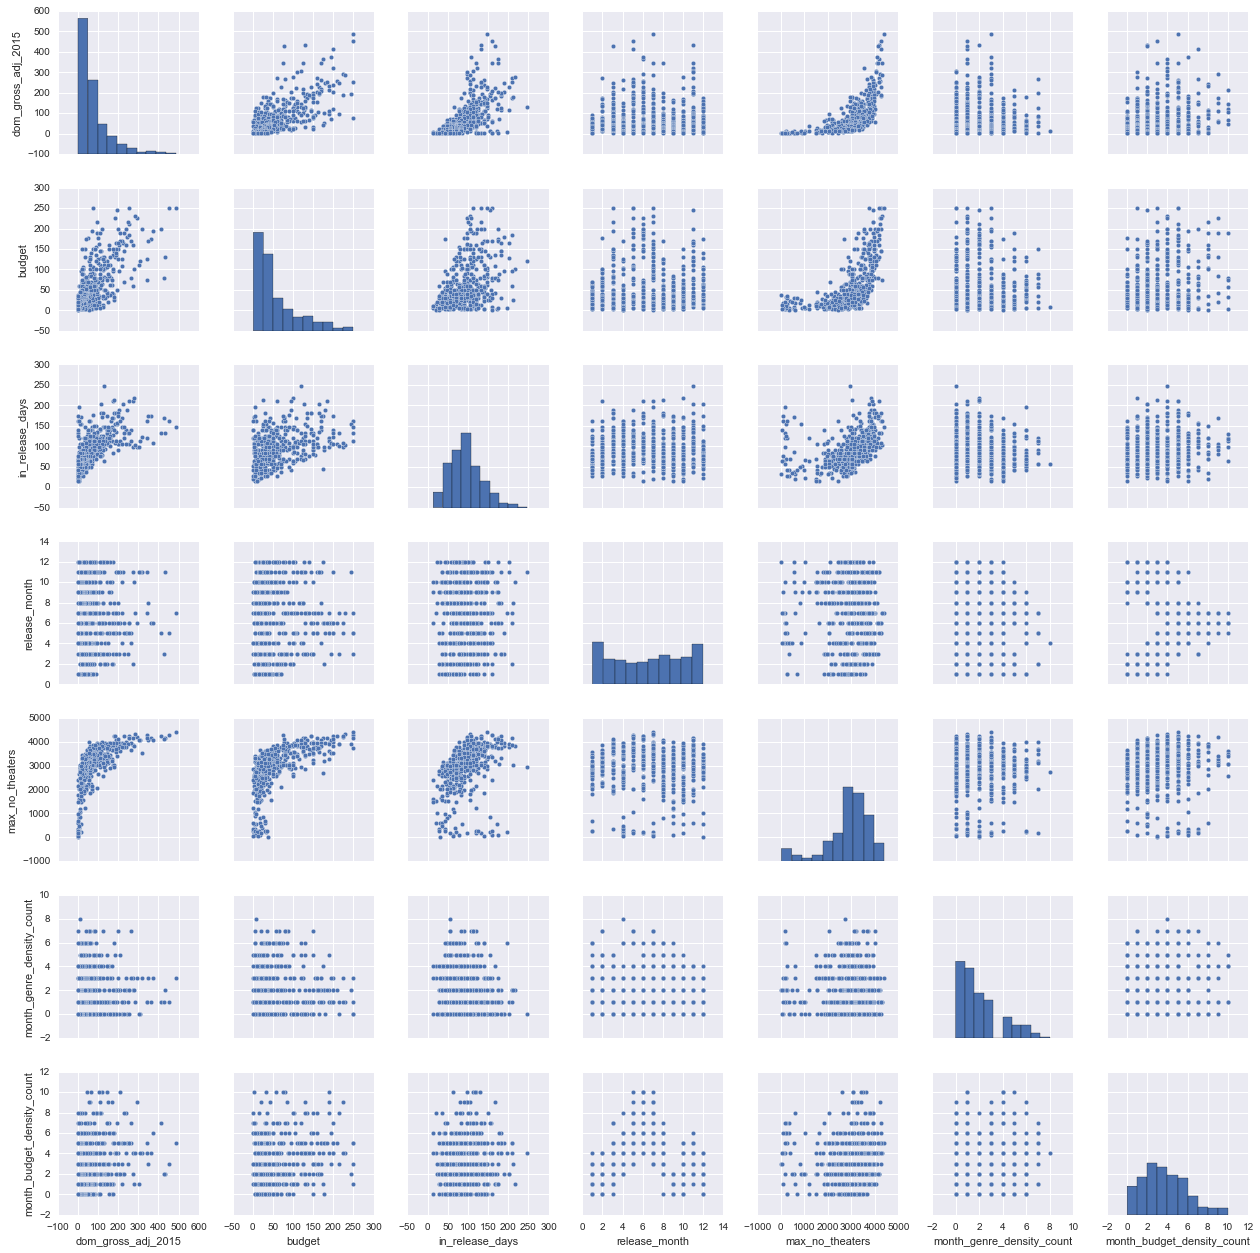

In [259]:
pairDF = DF3[['dom_gross_adj_2015','budget','in_release_days', 'release_month','max_no_theaters','month_genre_density_count','month_budget_density_count']]
sns.pairplot(pairDF);

# 4.0 Regression Model

In [155]:
##Separate OLS DataFrame
OLSDF = DF2.copy()
mask = np.random.random(OLSDF.shape[0])<0.8
OLSDF_train = OLSDF[mask]
OLSDF_test = OLSDF[~mask]

In [313]:
lm = smf.ols('dom_gross_adj_2015 ~  budget + runtime + release_month + distributor + genre + in_release_days + max_no_theaters + np.power(max_no_theaters,2) + month_budget_density_count + month_genre_density_count',data=OLSDF_train)
fit = lm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     dom_gross_adj_2015   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     30.64
Date:                Wed, 27 Apr 2016   Prob (F-statistic):           2.96e-92
Time:                        16:14:47   Log-Likelihood:                -2017.8
No. Observations:                 399   AIC:                             4118.
Df Residuals:                     358   BIC:                             4281.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Intercept                      -62.5776     25.857     -2.420      0.016      -113.428   -11.727
release_month[T.2.0]             3.8229     10.955      0.349      0.727       -17.721    25.367
release_month[T.3.0]            -4.9784     11.232     -0.443      0.658       -27.068    17.111
release_month[T.4.0]           -10.8374     11.975     -0.905      0.366       -34.387    12.712
release_month[T.5.0]            21.9543     13.984      1.570      0.117        -5.546    49.455
release_month[T.6.0]            29.9094     13.991      2.138      0.033         2.394    57.425
release_month[T.7.0]             7.3655     13.310      0.553      0.580       -18.809    33.540
release_month[T.8.0]             1.6540     11.070      0.149      0.881       -20.117    23.425
release_month[T.9.0]            -7.7022     10.519     -0.732      0.465       -28.389    12.985
release_month[T.10.0]           -2.1983     10.886     -0.202      0.840       -23.606    19.210
release_month[T.11.0]           12.2857     11.826      1.039      0.300       -10.972    35.543
release_month[T.12.0]            3.0302     12.066      0.251      0.802       -20.699    26.759
distributor[T.Focus]             2.9714     15.288      0.194      0.846       -27.094    33.037
distributor[T.Fox]             -23.0084      9.571     -2.404      0.017       -41.832    -4.185
distributor[T.Lionsgate]        13.6102     11.625      1.171      0.242        -9.251    36.472
distributor[T.Open]              6.4770     14.945      0.433      0.665       -22.915    35.869
distributor[T.Others]           14.4874     11.475      1.262      0.208        -8.080    37.055
distributor[T.Paramount]        15.8308     10.553      1.500      0.134        -4.923    36.584
distributor[T.Relativity]       -4.4357     12.657     -0.350      0.726       -29.327    20.455
distributor[T.Sony]             -1.5143      9.966     -0.152      0.879       -21.113    18.084
distributor[T.TriStar]          23.3849     14.973      1.562      0.119        -6.062    52.832
distributor[T.Universal]        27.1993     10.821      2.513      0.012         5.918    48.481
distributor[T.Warner]           -3.8491      9.459     -0.407      0.684       -22.452    14.754
distributor[T.Weinstein]       -13.8626     13.879     -0.999      0.319       -41.158    13.433
genre[T.Animation]             -32.8247     10.926     -3.004      0.003       -54.312   -11.338
genre[T.Comedy]                 -4.0331      7.813     -0.516      0.606       -19.397    11.331
genre[T.Crime]                 -10.8321     16.963     -0.639      0.524       -44.192    22.528
genre[T.Drama]                  -9.7568      9.739     -1.002      0.317       -28.910     9.397
genre[T.Family]                -43.2123     14.308     -3.020      0.003    

In [314]:
##Out of sample test
y_pred = fit.predict(OLSDF_test)
y_actual = np.array(OLSDF_test.iloc[:,1])
r2_score(y_actual,y_pred)

0.59840086628224276

After several iterations, density count variables are not statistically significant. Hence Luther Films should be okay with releasing the film in July 2016.

# 5.0 Model Refinement

### 5.1 Elastic Net Variable Selection

In [300]:
##Refine X to just the target variables. Preprocess for scikitlearn
ENDF = DF2.copy()
ENDF['theater_squared'] = np.power(ENDF['max_no_theaters'],2)
ENDF = ENDF[['dom_gross_adj_2015','distributor','release_month','genre','runtime','budget','in_release_days','max_no_theaters','theater_squared','month_genre_density_count','month_budget_density_count']]

In [301]:
##Create dummy variables for categorical variables
genre_dummy = pd.get_dummies(ENDF['genre'])
distributor_dummy = pd.get_dummies(ENDF['distributor'])
month_dummy = pd.get_dummies(ENDF['release_month'])

ENDF = pd.concat([ENDF,genre_dummy,distributor_dummy,month_dummy],axis=1)

In [303]:
##Delete non-dummy categorical variables
del ENDF['genre']
del ENDF['distributor']
del ENDF['release_month']
del ENDF['Action'] ##multicollinearity
del ENDF['Buena'] ##multicollinearity
del ENDF[1.0] ##multicollinearity

In [304]:
##Separate test and validation set 
mask = np.random.random(ENDF.shape[0]) < 0.8
ENDF_train = ENDF[mask]
ENDF_test = ENDF[~mask]

In [305]:
##Cross validation on training set
from sklearn.cross_validation import KFold
from sklearn.linear_model import ElasticNet

ENDF_train_X = ENDF_train.iloc[:,1:]
ENDF_train_Y = ENDF_train.iloc[:,0]
x = np.array(ENDF_train_X)
y = np.array(ENDF_train_Y)

kf = KFold(x.shape[0], n_folds = 5)
alphalist = []
SSElist = []
for a in np.arange(0, 1, 0.001):
    SSE = 0
    alphalist.append(a)
    for train_index, test_index in kf:
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        cf = ElasticNet(alpha=a,l1_ratio=0.5)
        cf.fit(x_train, y_train)
        y_pred = cf.predict(x_test)
        SSE += ((y_pred - y_test) **2).sum() #sum of squared errors
    SSE = SSE / 5
    SSElist.append(SSE)

C:\Users\kennd\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\Users\kennd\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:454: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
C:\Users\kennd\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


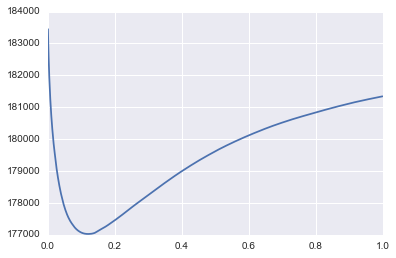

In [306]:
plt.plot(alphalist,SSElist)

In [307]:
optimal_alpha = pd.DataFrame(SSElist,alphalist).sort_values(0).index[0]

In [308]:
model = ElasticNet(alpha=optimal_alpha,l1_ratio=0.5)
model.fit(ENDF_train_X, ENDF_train_Y)

ElasticNet(alpha=0.12, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [309]:
from sklearn.metrics import r2_score

In [310]:
##Training set Adj. RSquare
y_pred = model.predict(ENDF_train_X)
y_actual = np.array(ENDF_train_Y)
1-(1-r2_score(y_actual,y_pred))*(DF5X_train.shape[0]-1)/(DF5X_train.shape[0]-DF5X_train.shape[1])

0.71410760004104756

In [311]:
##Test set Adj. RSquare
ENDF_test_X = ENDF_test.iloc[:,1:]
ENDF_test_Y = ENDF_test.iloc[:,0]
x_test = np.array(ENDF_test_X)
y_test = np.array(ENDF_test_Y)
y_pred = model.predict(x_test)
y_actual = np.array(y_test)
1-(1-r2_score(y_actual,y_pred))*(ENDF_test_X.shape[0]-1)/(ENDF_test_X.shape[0]-ENDF_test_X.shape[1])

0.41645251181923204

In [312]:
##Variables to be selected
EN_coef = pd.DataFrame(model.coef_,np.array(ENDF_train_X.columns),columns = ['coefficient']).reset_index()
EN_coef[abs(EN_coef['coefficient']) > 0.000]

,index,coefficient
0,runtime,0.766987
1,budget,0.183342
2,in_release_days,0.550633
3,max_no_theaters,-0.047224
4,theater_squared,0.000019
5,month_genre_density_count,0.376018
6,month_budget_density_count,0.909460
7,Animation,-6.070155
8,Comedy,3.705060
9,Crime,0.650578


In [288]:
EN_coef

,index,coefficient
0,runtime,0.632503
1,budget,0.267462
2,in_release_days,0.516744
3,max_no_theaters,-0.051856
4,theater_squared,0.000020
5,Animation,-7.044064
6,Comedy,3.931112
7,Crime,-0.000000
8,Drama,-0.201945
9,Family,-5.485068


# 6.0 OLS with EN Variable Selection

In [332]:
predictors = (np.array(EN_coef[abs(EN_coef['coefficient']) > 0.000]['index'].values))
string = str("")
for x in predictors:
    string = string + ", '" + str(x) + "'"
string = string[2:]

In [333]:
string

"'runtime', 'budget', 'in_release_days', 'max_no_theaters', 'theater_squared', 'month_genre_density_count', 'month_budget_density_count', 'Animation', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Horror', 'Others', 'Sci-Fi', 'Thriller', 'Fox', 'Lionsgate', 'Others', 'Paramount', 'Relativity', 'Sony', 'TriStar', 'Universal', 'Warner', 'Weinstein', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0', '12.0'"

In [317]:
##Copy ENDF to use in OLS
OLS2DF = ENDF.copy()

In [342]:
OLS2DF_X = OLS2DF[['runtime', 'budget', 'in_release_days', 'max_no_theaters', 'theater_squared', 'month_genre_density_count', 'month_budget_density_count', 'Animation', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Horror', 'Others', 'Sci-Fi', 'Thriller', 'Fox', 'Lionsgate', 'Others', 'Paramount', 'Relativity', 'Sony', 'TriStar', 'Universal', 'Warner', 'Weinstein', 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]]
OLS2DF_Y = OLS2DF.iloc[:,0]

In [343]:
ols2 = smf.OLS(OLS2DF_Y,OLS2DF_X)

fit2 = ols2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     dom_gross_adj_2015   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     78.79
Date:                Wed, 27 Apr 2016   Prob (F-statistic):          5.11e-175
Time:                        16:22:17   Log-Likelihood:                -2521.8
No. Observations:                 493   AIC:                             5120.
Df Residuals:                     455   BIC:                             5279.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
runtime                        0.1769      0.115      1.541      0.124        -0.049     0.402
budget                         0.1931      0.065      2.964      0.003         0.065     0.321
in_release_days                0.6129      0.067      9.126      0.000         0.481     0.745
max_no_theaters               -0.0614      0.008     -7.404      0.000        -0.078    -0.045
theater_squared             2.169e-05   2.09e-06     10.359      0.000      1.76e-05  2.58e-05
month_genre_density_count     -3.3966      1.391     -2.441      0.015        -6.131    -0.662
month_budget_density_count    -0.9150      1.331     -0.687      0.492        -3.531     1.701
Animation                    -46.6928      9.394     -4.970      0.000       -65.154   -28.232
Comedy                        -7.8149      7.064     -1.106      0.269       -21.697     6.067
Crime                        -15.8274     14.846     -1.066      0.287       -45.002    13.348
Drama                        -16.2673      8.845     -1.839      0.067       -33.649     1.115
Family                       -55.5421     13.566     -4.094      0.000       -82.202   -28.882
Fantasy                      -41.7299     13.903     -3.002      0.003       -69.051   -14.408
Horror                       -11.4191      9.424     -1.212      0.226       -29.940     7.102
Others                       -10.5783      4.430     -2.388      0.017       -19.285    -1.872
Others                        -1.1900      4.346     -0.274      0.784        -9.731     7.351
Sci-Fi                       -32.6111      8.510     -3.832      0.000       -49.334   -15.888
Thriller                      -6.9718      9.679     -0.720      0.472       -25.993    12.050
Fox                          -34.2346      7.379     -4.640      0.000       -48.736   -19.734
Lionsgate                      3.0806      8.699      0.354      0.723       -14.015    20.177
Others                       -10.5783      4.430     -2.388      0.017       -19.285    -1.872
Others                        -1.1900      4.346     -0.274      0.784        -9.731     7.351
Paramount                     -0.6702      8.365     -0.080      0.936       -17.108    15.768
Relativity                   -21.4667     10.708     -2.005      0.046       -42.510    -0.424
Sony                         -10.6464      7.556     -1.409      0.160       -25.495     4.202
TriStar                       15.0913     12.726      1.186      0.236        -9.918    40.101
Universal                     13.3997      8.483      1.580      0.115        -3.271    30.070
Warner                       -19.0804      7.295     -2.615      0.009       -33.417    -4.744
Weinstein                    -23.5637     11.964     -1.969      0.050       -47.076    -0.051
2.0                            3.3637     1